read_csv()函数的相关参数

- index_col，指定要读取csv中的哪一列作为行标签
- header，指定要读取csv中的哪一行作为列标签
- sep，指定分隔符
- names，指定各列名称
- usecols，可以传入“列名称列表”或者“列索引列表”来指定导入对应的列。

## 指定行标签（使用`index_col`参数）

先看一下，读取csv_write_ex.csv的效果，打开该csv文件显示如下：

    ,a,b,c
    0,61,69,38
    1,64,2,6
    2,74,70,81
    3,43,66,47
    4,54,86,70


当我们直接读取时，看到的结果是这样：

In [2]:
import pandas as pd
import numpy as np

pd.read_csv("ex_header.csv")

,Unnamed: 0,a,b,c
0,0,61,69,38
1,1,64,2,6
2,2,74,70,81
3,3,43,66,47
4,4,54,86,70


也就是，使用`read_csv()`没用给定任何参数的时候，会自动添加0，1，2...递增的行标签，但实际上原来的行标签已经保存在里面了。我们可以直接使用已有的行标签，因此需要通过`index_col`来指定

In [3]:
pd.read_csv("ex_header.csv", index_col=0)

,a,b,c
0,61,69,38
1,64,2,6
2,74,70,81
3,43,66,47
4,54,86,70


但是，如果使用了`usecols`，那么就可以不用再使用`index_col`了，比如：

In [6]:
pd.read_csv("ex_header.csv", index_col=0, usecols=['a', 'b'])

,b
a,
61,69
64,2
74,70
43,66
54,86


## 指定列标签（使用`header`参数）

直接读取csv时，默认以第一行，即`header = 0`作为标题，如果不需要标题，那么设置`header=None`，此时第一行也会被当做数据。

*注：这里需要注意区分pandas在读取时候对于行列标签默认处理的不同，会默认新增行标签，但会默认以第一行作为列标签。*

In [3]:
import pandas as pd

pd.read_csv("ex_header.csv", index_col=0, header=None)

,1,2,3
0,,,
NaN,a,b,c
0.0,61,69,38
1.0,64,2,6
2.0,74,70,81
3.0,43,66,47
4.0,54,86,70


In [ ]:
pd.read_csv("ex_header.csv", index_col=0, header=1)

## 指定列名称（使用`names`）

使用`names`参数可以指定各列名称，该参数通常是在原始csv里面并没用header数据，所以需要另外指定的情况：

In [10]:
pd.read_csv("csv_write_ex.csv", index_col=0, names=['A', 'B', 'C'])

,A,B,C
NaN,a,b,c
0.0,61,69,38
1.0,64,2,6
2.0,74,70,81
3.0,43,66,47
4.0,54,86,70


读取没有列标题的csv，如果不指定`name`参数，那么会默认以第一行作为标题行。


In [1]:
import pandas as pd 

pd.read_csv("ex_noheader.csv", sep = ";", names = ["time", "buildid", "owner", "gerrit"])

,time,buildid,owner,gerrit
0,2023-02-27 20:53,1831,krzysztof.wieczorek@nokia.com,https://gerrit.ext.net.nokia.com/gerrit/c/MN/5...
1,2023-02-27 19:30,1827,maciej.rekiel@nokia.com,https://gerrit.ext.net.nokia.com/gerrit/c/MN/5...


In [6]:
df = pd.read_csv("ex_noheader.csv", sep = ";", index_col=1, names = ["time", "buildid", "owner", "gerrit"])

print(df[df['owner'] == 'krzysztof.wieczorek@nokia.com']['gerrit'].iloc[0])
print(df.loc[1827, 'owner'])

maciej.rekiel@nokia.com


## 选择读取特定列（使用`usecols`）

这里需要特别注意的有两点：

1. 不要和index_col混用，如果两者在一起，那么是先用usecols选择好数据，再应用index_col。
2. 在`usecols`指定的列标签并无法指定顺序，比如原始csv里面的列顺序是`a,b,c`，那么在读取的时候尽管使用`usecols=['b', 'c', 'a']`读取出来的数据列的顺序依然是`a,b,c`。

In [1]:
import pandas as pd

df = pd.read_csv("ex_header.csv", usecols=['a', 'b'])
print(df)
print(df.iloc[0,1])

    a   b
0  61  69
1  64   2
2  74  70
3  43  66
4  54  86
69


In [3]:
df = pd.read_csv("ex_header.csv", usecols=['b', 'a'])
print(df)
print(df.iloc[0,1])

    a   b
0  61  69
1  64   2
2  74  70
3  43  66
4  54  86
69


In [13]:
pd.read_csv("csv_write_ex.csv", index_col=0, usecols=['a', 'b'])

,b
a,
61,69
64,2
74,70
43,66
54,86


你可以使用lambeda表达式进行反向选取。

```
df = pd.read_csv("f500.csv", usecols = lambda column : column not in
["company" , "rank", "revenues"])
```

## 跳过特定行（使用`skiprows`）

- `skiprows = 2`代表不读取开头的两行。
- `skiprows = [0, 1, 3]`表示不读取第0，1，3行。

这个跳过的效果有点奇特，似乎是按照原始文本内容来跳过。

In [7]:
import pandas as pd

df1 = pd.read_csv("ex_header.csv", index_col=0)
print(df1)
print("--------")

df2 = pd.read_csv("ex_header.csv", skiprows=2, header=None)
print(df2)
print("length of dfs = {}".format(len(df2)))
print("--------")

df3 = pd.read_csv("ex_header.csv", index_col=0, skiprows=[0,2])
print(df3)
print("--------")

    a   b   c
0  61  69  38
1  64   2   6
2  74  70  81
3  43  66  47
4  54  86  70
--------
   0   1   2   3
0  1  64   2   6
1  2  74  70  81
2  3  43  66  47
3  4  54  86  70
length of dfs = 4
--------
   61  69  38
0            
2  74  70  81
3  43  66  47
4  54  86  70
--------


## 画图测试

<Axes: xlabel='Date'>

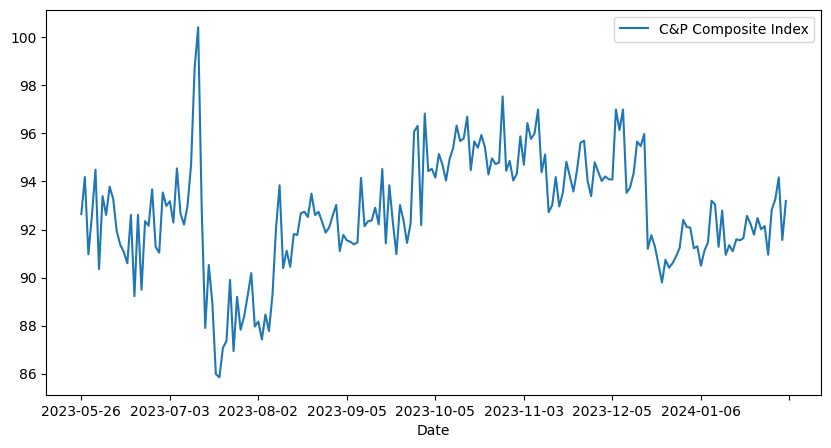

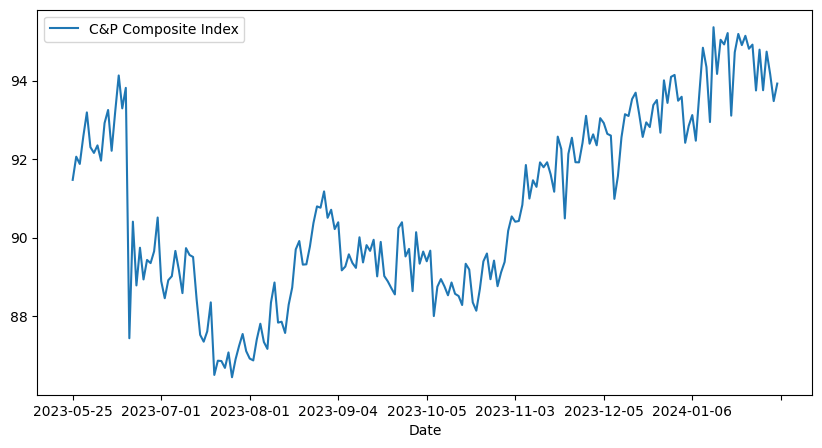

In [15]:
import os
import pandas as pd

path1 = r'C:\N-20L6PF1F2MV8-Data\lianbche\Documents\2024\02\05-script-composite-index-change\composite-index-2nd-version-new-algo'
path2 = r'C:\N-20L6PF1F2MV8-Data\lianbche\Documents\2024\02\05-script-composite-index-change\composite-index-backup-0206'

df1 = pd.read_csv(os.path.join(path1, 'composite_index_asib_abio_507_new.csv'), usecols=['Date', 'C&P Composite Index'])
df1 = df1[0:200].sort_values('Date').set_index('Date')

df2 = pd.read_csv(os.path.join(path2, 'composite_index_asib_abio_507.csv'), usecols=['Date', 'C&P Composite Index'])
df2 = df2[df2['C&P Composite Index'] != 0.0]
df2 = df2[0:200].sort_values('Date').set_index('Date')

df1.plot(figsize = (10, 5))
df2.plot(figsize = (10, 5))